# **Prophet**

In [1]:
!pip install pystan==2.19.1.1
!pip install fbprophet

^C
^C
  Using cached pystan-2.19.1.1.tar.gz (16.2 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py install for pystan: started
  Running setup.py install for pystan: still running...
  Running setup.py install for pystan: still running...
  Running setup.py install for pystan: still running...
  Running setup.py install for pystan: still running...
  Running setup.py install for pystan: still running...
  Running setup.py install for pystan: still running...
  Running setup.py install for pystan: finished with status 'error'


IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached cmdstanpy-0.9.5-py3-none-any.whl (37 kB)
  Using cached pystan-3.6.0-py3-none-any.whl (13 kB)
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl (18 kB)
  Using cached convertdate-2.4.0-py3-none-any.whl (47 kB)
  Using cached holidays-0.19-py3-none-any.whl (208 kB)
  Using cached hijri_converter-2.2.4-py3-none-any.whl (14 kB)
  Using cached aiohttp-3.8.3-cp310-cp310-win_amd64.whl (319 kB)
  Using cached clikit-0.6.2-py2.py3-none-any.whl (91 kB)
  Using cached pystan-3.5.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.4.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.3.0-py3-none-any.whl (13 kB)
  Using cached pysimdjson-3.2.0.tar.gz (411 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached pystan-3.2.0-py3-none-any.whl (13 kB)
  Using cached pystan

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [ ]:
import pandas as pd
from fbprophet import Prophet
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/Miles_Traveled.csv')
df.head()

,DATE,TRFVOLUSM227NFWA
0,1970-01-01,80173.0
1,1970-02-01,77442.0
2,1970-03-01,90223.0
3,1970-04-01,89956.0
4,1970-05-01,97972.0


In [ ]:
df.info()    # data type 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DATE              588 non-null    object 
 1   TRFVOLUSM227NFWA  588 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.3+ KB


In [ ]:
# step 1 / ds,y 컬럼으로 변경

df.columns = ['ds', 'y']
df.head()

,ds,y
0,1970-01-01,80173.0
1,1970-02-01,77442.0
2,1970-03-01,90223.0
3,1970-04-01,89956.0
4,1970-05-01,97972.0


In [ ]:
# step 2 / 날짜 정보를 가지는 컬럼을 datetime 자료형으로 변경

df['ds'] = pd.to_datetime(df['ds'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      588 non-null    datetime64[ns]
 1   y       588 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 9.3 KB


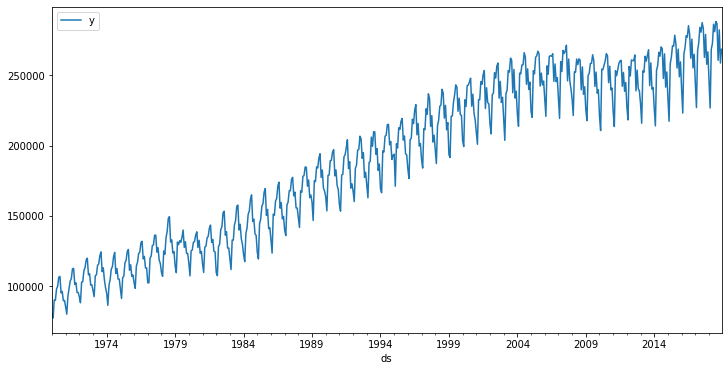

In [ ]:
df.plot(x = 'ds', y = 'y', figsize = (12, 6))

In [ ]:
len(df)

588

In [ ]:
# train : 훈련 데이터 / test : 테스트 데이터 -> seasonal한 데이터는 계절성을 확인하기 위해 최소한 12개월 단위의 데이터 필요

train = df.iloc[:576]
test = df.iloc[576:]

In [ ]:
# step 3 / 모델학습

m = Prophet()
m.fit(train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
# step 4 / 예측 후 데이터가 들어갈 dataframe을 생성

future = m.make_future_dataframe(periods = 12, freq = 'MS')
future

In [ ]:
# step 5 / 예측 -> yhat :  예측한 데이터

forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper
576,2018-01-01,243959.082641,237926.247626,249667.181731
577,2018-02-01,235591.209755,230029.103066,241582.787255
578,2018-03-01,262795.010465,256838.002222,268222.155364
579,2018-04-01,263000.536347,257275.988059,268811.845873
580,2018-05-01,272726.633544,267325.916875,278622.483703
581,2018-06-01,272982.013199,267224.883265,278655.163803
582,2018-07-01,279443.147798,273317.797809,284992.013093
583,2018-08-01,279982.270949,274461.578936,285769.267088
584,2018-09-01,262008.088487,256038.588641,267761.282552
585,2018-10-01,269123.030010,263302.374915,275114.118086


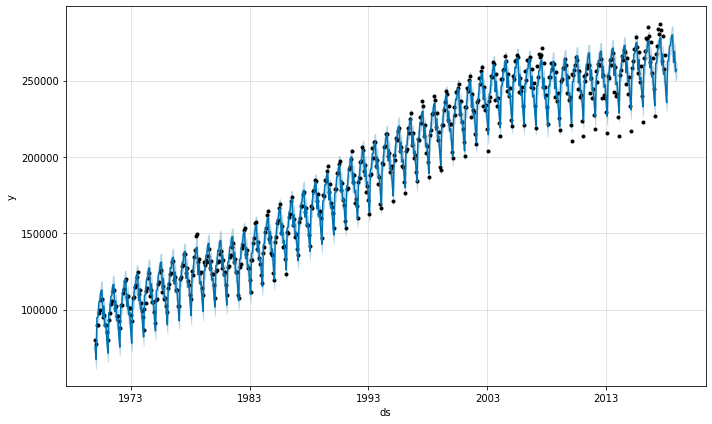

In [ ]:
# step 6 / 시각화

m.plot(forecast);

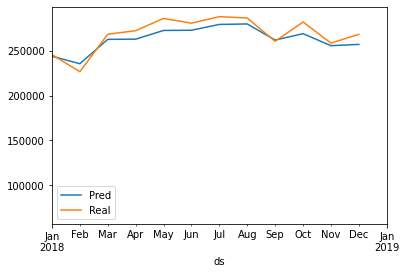

In [ ]:
# 예측 데이터와 test데이터 시각화로 비교

ax = forecast.plot(x = 'ds', y = 'yhat', label = 'Pred')
test.plot(x = 'ds', y = 'y', label = 'Real', ax = ax, xlim = ['2018-01-01', '2019-01-01'])

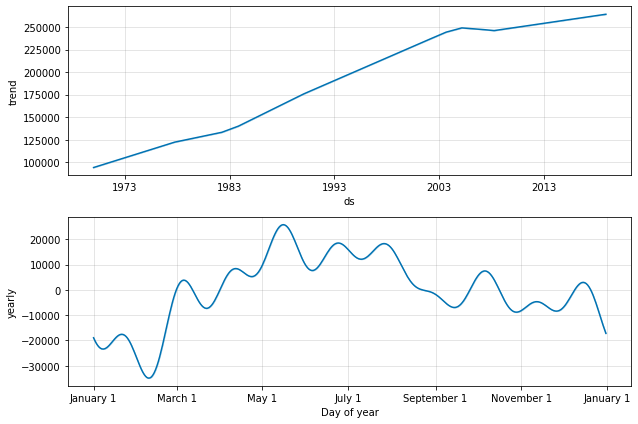

In [ ]:
m.plot_components(forecast) ;

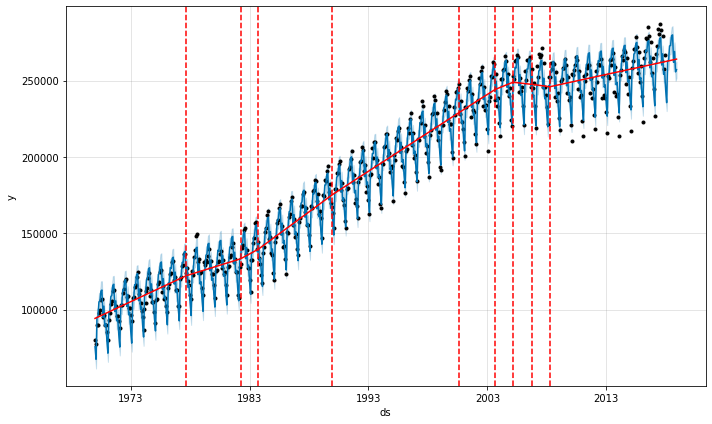

In [ ]:
# trend changes (빨간 점선: trend가 바뀌는 부분)

from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

# Mul Model

In [ ]:
mul_model = Prophet(seasonality_mode='multiplicative')
mul_model.fit(train)# step 5, 예측
forecast = mul_model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
576,2018-01-01,237369.089727,231755.123969,242421.851550
577,2018-02-01,225600.089186,220370.272931,230682.442649
578,2018-03-01,263694.742122,258272.317618,269211.090325
579,2018-04-01,263635.287652,258280.157016,269408.082596
580,2018-05-01,276507.432794,271326.095885,282217.369703
581,2018-06-01,276435.680803,271047.343341,282366.730468
582,2018-07-01,284486.413771,279080.891826,289550.629509
583,2018-08-01,284724.028177,279364.387085,290255.711417
584,2018-09-01,260501.581368,254880.835893,265516.665736
585,2018-10-01,271366.657804,265864.166527,276714.086185


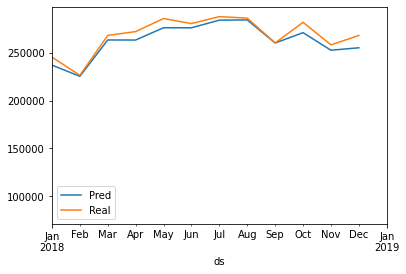

In [ ]:
ax = forecast.plot(x = 'ds', y = 'yhat', label = 'Pred')
test.plot(x = 'ds', y = 'y', label = 'Real', ax= ax, xlim = ['2018-01-01', '2019-01-01'])

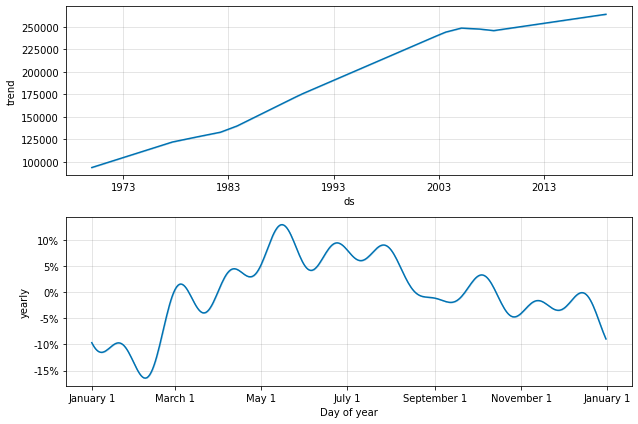

In [ ]:
m.plot_components(forecast);

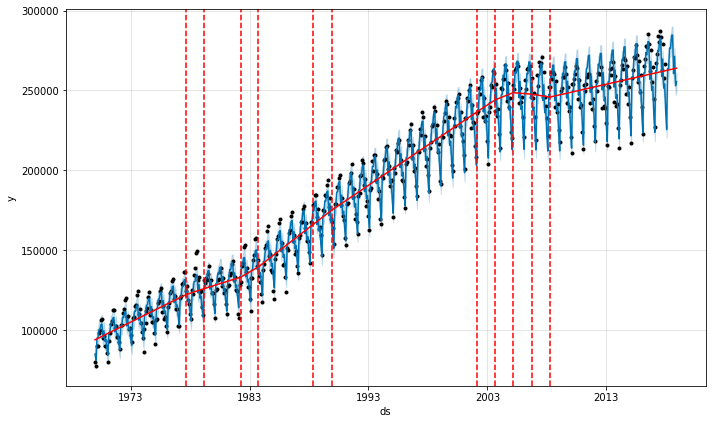

In [ ]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

# 평가

## rmse (root mean square error)

In [ ]:
from statsmodels.tools.eval_measures import rmse        # root mean square error   / 일정 구간만 비교 가능

In [ ]:
# 예측을 한 데이터와 실제 test데이터 비교

predictions = forecast.iloc[-12 : ]['yhat']
len(predictions)

12

In [ ]:
rmse(predictions, test['y'])                   # rmse(예측값, 정답)  -> 값이 클수록 모델의 정확도가 낮다고 본다.

7166.905842658019

## cross validation

In [ ]:
from fbprophet.diagnostics import cross_validation,performance_metrics
from fbprophet.plot import plot_cross_validation_metric

In [ ]:
df_cv = cross_validation(mul_model, initial = f'{5 * 365} days', period = f'{5 * 365} days', horizon = f'{365} days')           # 5년을 학습하고 1년을 예측하고 평가 후 5년 이동하고 다시 반복

INFO:fbprophet:Making 9 forecasts with cutoffs between 1976-12-11 00:00:00 and 2016-12-01 00:00:00


  0%|          | 0/9 [00:00<?, ?it/s]

In [ ]:
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1977-01-01,106264.483030,104904.862521,107489.879836,102445.0,1976-12-11
1,1977-02-01,99635.332014,98291.226368,100986.833920,102416.0,1976-12-11
2,1977-03-01,118429.887993,117020.080156,119772.939482,119960.0,1976-12-11
3,1977-04-01,120350.669111,118816.541422,121722.328316,121513.0,1976-12-11
4,1977-05-01,128575.446185,127126.543993,129989.545372,128884.0,1976-12-11
...,...,...,...,...,...,...
103,2017-08-01,277848.097912,272252.925219,283386.764304,283184.0,2016-12-01
104,2017-09-01,254201.733051,248834.024467,259562.100056,262673.0,2016-12-01
105,2017-10-01,264723.822632,259138.699898,270247.406701,278937.0,2016-12-01
106,2017-11-01,246864.033686,241289.808837,252204.879478,257712.0,2016-12-01


In [ ]:
performance_metrics(df_cv)

,horizon,mse,rmse,mae,mape,mdape,coverage
0,52 days,2.690901e+07,5187.389039,3950.179371,0.023504,0.018424,0.5
1,53 days,2.553343e+07,5053.061789,3659.485362,0.020624,0.014656,0.6
2,54 days,2.661229e+07,5158.709893,3777.702341,0.020795,0.014656,0.6
3,55 days,2.644619e+07,5142.586351,3731.767863,0.020324,0.013922,0.6
4,57 days,3.171054e+07,5631.210971,4353.978764,0.023648,0.018424,0.5
...,...,...,...,...,...,...,...
94,360 days,1.873966e+07,4328.932539,3070.471308,0.016343,0.011142,0.6
95,361 days,2.013264e+07,4486.941579,3414.307921,0.017790,0.014778,0.6
96,362 days,2.858340e+07,5346.344249,4268.582565,0.021333,0.018822,0.5
97,364 days,2.871006e+07,5358.176861,4296.356717,0.021476,0.018822,0.5


/usr/local/lib/python3.8/dist-packages/fbprophet/plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.8/dist-packages/fbprophet/plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


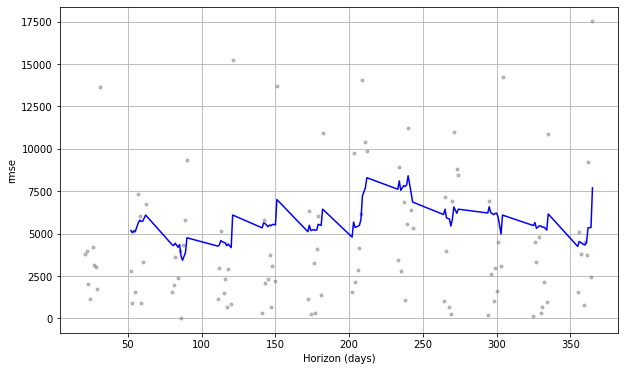

In [ ]:
plot_cross_validation_metric(df_cv, metric='rmse');

## Prophet excercise

In [ ]:
import pandas as pd
from fbprophet import Prophet
%matplotlib inline

In [ ]:
avocado = pd.read_csv('/content/avocado.csv').drop(['Unnamed: 0'], axis = 1)
avocado.sort_values('Date')

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
9593,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
10009,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton
1819,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh
9333,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8574,2018-03-25,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,conventional,2018,Chicago
9018,2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,conventional,2018,SouthCentral
18141,2018-03-25,1.42,163496.70,29253.30,5080.04,0.00,129163.36,109052.26,20111.10,0.00,organic,2018,SouthCentral
17673,2018-03-25,1.70,190257.38,29644.09,70982.10,0.00,89631.19,89424.11,207.08,0.00,organic,2018,California


In [ ]:
avocado_data = avocado.loc[: ,['Date', 'AveragePrice']]
avocado_data

,Date,AveragePrice
0,2015-12-27,1.33
1,2015-12-20,1.35
2,2015-12-13,0.93
3,2015-12-06,1.08
4,2015-11-29,1.28
...,...,...
18244,2018-02-04,1.63
18245,2018-01-28,1.71
18246,2018-01-21,1.87
18247,2018-01-14,1.93


In [ ]:
# step 1 / ds,y 컬럼으로 변경

avocado_data.columns = ['ds', 'y']


In [ ]:
# step 2 / 날짜 정보를 가지는 컬럼을 datetime 자료형으로 변경

avocado_data['ds'] = pd.to_datetime(avocado_data['ds'])
avocado_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      18249 non-null  datetime64[ns]
 1   y       18249 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 285.3 KB


In [ ]:
# 날짜 별로 groupby한 후 평균을 냄

avocado_1 = avocado_data.groupby('ds').mean()

In [ ]:
avocado_2 = avocado_1.reset_index()

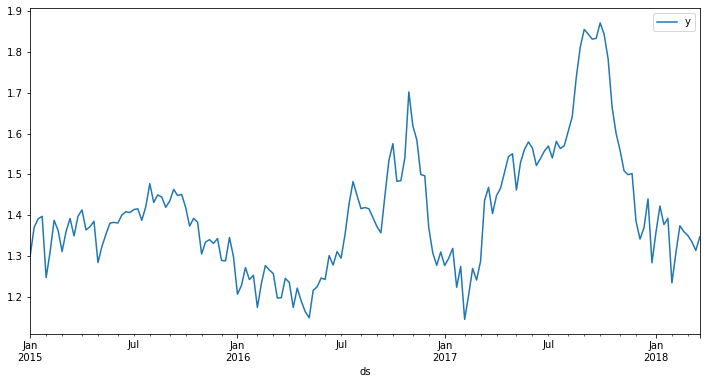

In [ ]:
avocado_2.plot(x = 'ds', y = 'y', figsize=(12, 6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc58be42190>]],
      dtype=object)

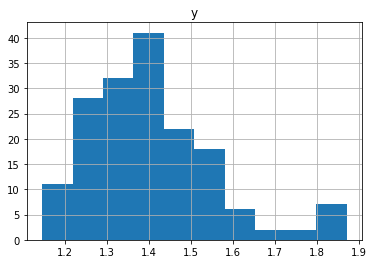

In [ ]:
avocado_2.hist('y')    

In [ ]:
len(avocado_2)

169

In [ ]:
# train : 훈련 데이터 / test : 테스트 데이터

train = avocado_2.iloc[:117]
test = avocado_2.iloc[117:]

In [ ]:
# step 3 / 모델학습

model = Prophet()
model.fit(train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
# step 4 / 예측 후 데이터가 들어갈 dataframe을 생성

future = model.make_future_dataframe(periods = 52, freq = 'W')
future

,ds
0,2015-01-04
1,2015-01-11
2,2015-01-18
3,2015-01-25
4,2015-02-01
...,...
164,2018-02-25
165,2018-03-04
166,2018-03-11
167,2018-03-18


In [ ]:
# step 5 / 예측 -> yhat :  예측한 데이터

forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2015-01-04,1.383023,1.314573,1.451907
1,2015-01-11,1.384428,1.317308,1.451702
2,2015-01-18,1.378637,1.308920,1.441913
3,2015-01-25,1.355160,1.292331,1.423575
4,2015-02-01,1.325126,1.255420,1.390885
...,...,...,...,...
164,2018-02-25,1.427441,1.355487,1.504393
165,2018-03-04,1.449250,1.367834,1.528791
166,2018-03-11,1.462277,1.379791,1.540144
167,2018-03-18,1.473711,1.394882,1.553320


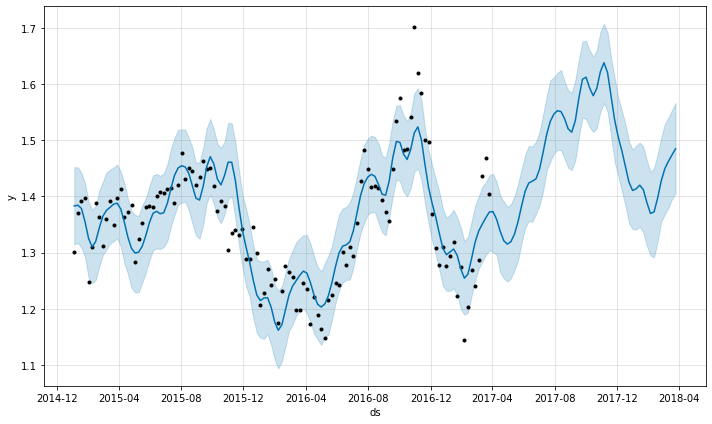

In [ ]:
# step 6 / 시각화

model.plot(forecast) ;

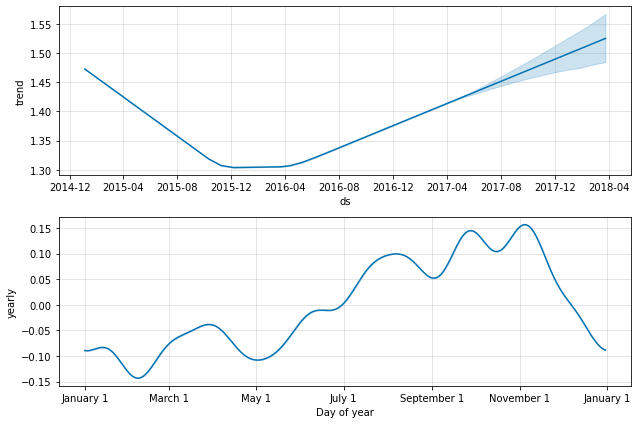

In [ ]:
model.plot_components(forecast) ;

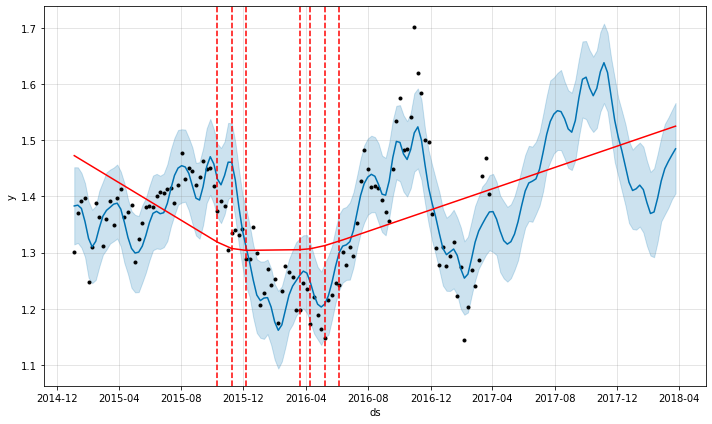

In [ ]:
# trend changes (빨간 점선: trend가 바뀌는 부분)

from fbprophet.plot import add_changepoints_to_plot
fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast)

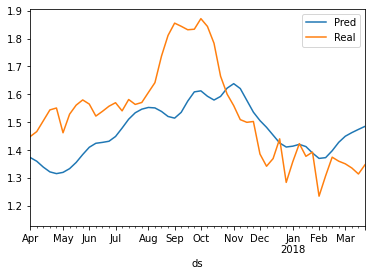

In [ ]:
ax = forecast.plot(x = 'ds', y = 'yhat', label = 'Pred')
test.plot(x = 'ds', y = 'y', label = 'Real', ax = ax, xlim = [test['ds'].min().strftime('%Y-%m-%d'),
                                                              test['ds'].max().strftime('%Y-%m-%d')])

## 평가

In [ ]:
from statsmodels.tools.eval_measures import rmse

In [ ]:
predictions = forecast.iloc[-52 : ]['yhat']
len(predictions)

52

In [ ]:
rmse(predictions, test['y'])

0.1520327274216421

In [ ]:
from fbprophet.diagnostics import cross_validation,performance_metrics
from fbprophet.plot import plot_cross_validation_metric

In [ ]:
df_cv = cross_validation(model, initial = f'{180} days', period = f'{180} days', horizon=f'{30} days')

INFO:fbprophet:Making 4 forecasts with cutoffs between 2015-09-03 00:00:00 and 2017-02-24 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
performance_metrics(df_cv)

,horizon,mse,rmse,mae,mape,mdape,coverage
0,2 days,0.006324,0.079525,0.079525,0.064076,0.064076,0.0
1,3 days,0.017123,0.130855,0.130855,0.091230,0.091230,0.0
2,5 days,0.000164,0.012824,0.012824,0.010203,0.010203,1.0
3,7 days,0.001621,0.040259,0.040259,0.029342,0.029342,0.0
4,9 days,0.001143,0.033811,0.033811,0.026263,0.026263,1.0
5,10 days,0.225827,0.475213,0.475213,0.324767,0.324767,0.0
6,12 days,0.004107,0.064083,0.064083,0.053534,0.053534,0.0
7,14 days,0.004748,0.068906,0.068906,0.050784,0.050784,0.0
8,16 days,0.017101,0.130770,0.130770,0.091058,0.091058,0.0
9,17 days,1.467121,1.211248,1.211248,0.836465,0.836465,0.0


/usr/local/lib/python3.8/dist-packages/fbprophet/plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.8/dist-packages/fbprophet/plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


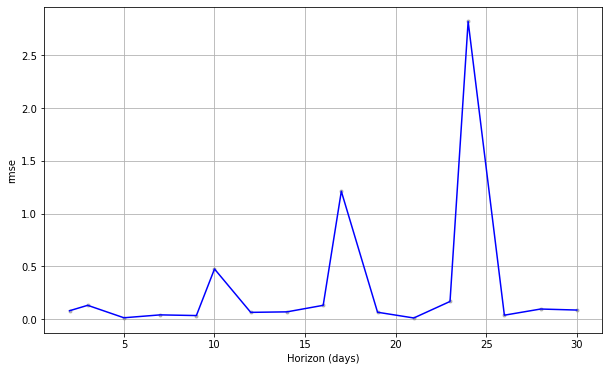

In [ ]:
plot_cross_validation_metric(df_cv, metric = 'rmse');